In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer


# Note: This notebook is for code brainstormed and written by ChatGPT

-----------
## Prompt 1:

given a subset of the OpenFoodFacts.org data with the following columns, what analysis and summaries should be done to extract key insights and trends? list your steps and how you might code this in python.

code, food_groups_en_x, countries_en_x, product_name, countries_en_y, brands, abbreviated_product_name, generic_name, quantity, ecoscore_score, nutriscore_score, nutriscore_grade, nova_group, food_groups_en_y, sodium_100g, fat_100g, saturated-fat_100g, sugars_100g, carbohydrates_100g, proteins_100g

------------

To extract key insights and trends from the subset of OpenFoodFacts.org data, we can follow several steps:

1. Data Cleaning and Preprocessing:
- Check for missing values and handle them accordingly (removing rows with missing values or imputing values).
- Ensure data types are appropriate for analysis (e.g., numerical columns should be numeric, categorical columns should be categorical).
- Standardize or clean up text data if necessary (e.g., remove special characters, lowercase all text).

2. Exploratory Data Analysis (EDA):
- Explore the distributions of numeric variables (e.g., using histograms, box plots).
- Analyze the frequency distribution of categorical variables (e.g., using bar plots).
- Look for outliers and anomalies.
- Investigate relationships between variables (e.g., correlation between ecoscore_score and nutriscore_score).

3. Key Insights and Trends:
- Identify popular food groups, countries, brands, etc.
- Examine the distribution of ecoscore_score, nutriscore_score, and other nutritional attributes.
- Look for any patterns or trends in the data over time (if applicable).
- Compare nutritional content across different food groups or countries.

4. Statistical Analysis:
- Conduct hypothesis tests if needed to determine if there are significant differences between groups (e.g., ANOVA to compare mean nutritional values across different food groups).

5. Visualization:
- Create visualizations to represent key findings and insights (e.g., bar plots, scatter plots, heatmaps).
- Use visualizations to make complex patterns more interpretable.

Here's how you might code these steps in Python using libraries like Pandas, Matplotlib, and Seaborn:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data
data = pd.read_csv("data/preprocessed.csv")

/var/folders/bn/jw4b363n6cz8jy9jwmhp7q0c0000gn/T/ipykernel_3505/3791617627.py:2: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/preprocessed.csv")


In [5]:
# 1. Data Cleaning and Preprocessing
# Handling missing values
data.dropna(inplace=True)  # Drop rows with missing values
# Convert data types if needed
data['quantity'] = pd.to_numeric(data['quantity'], errors='coerce')  # Convert to numeric
# Clean text data if needed

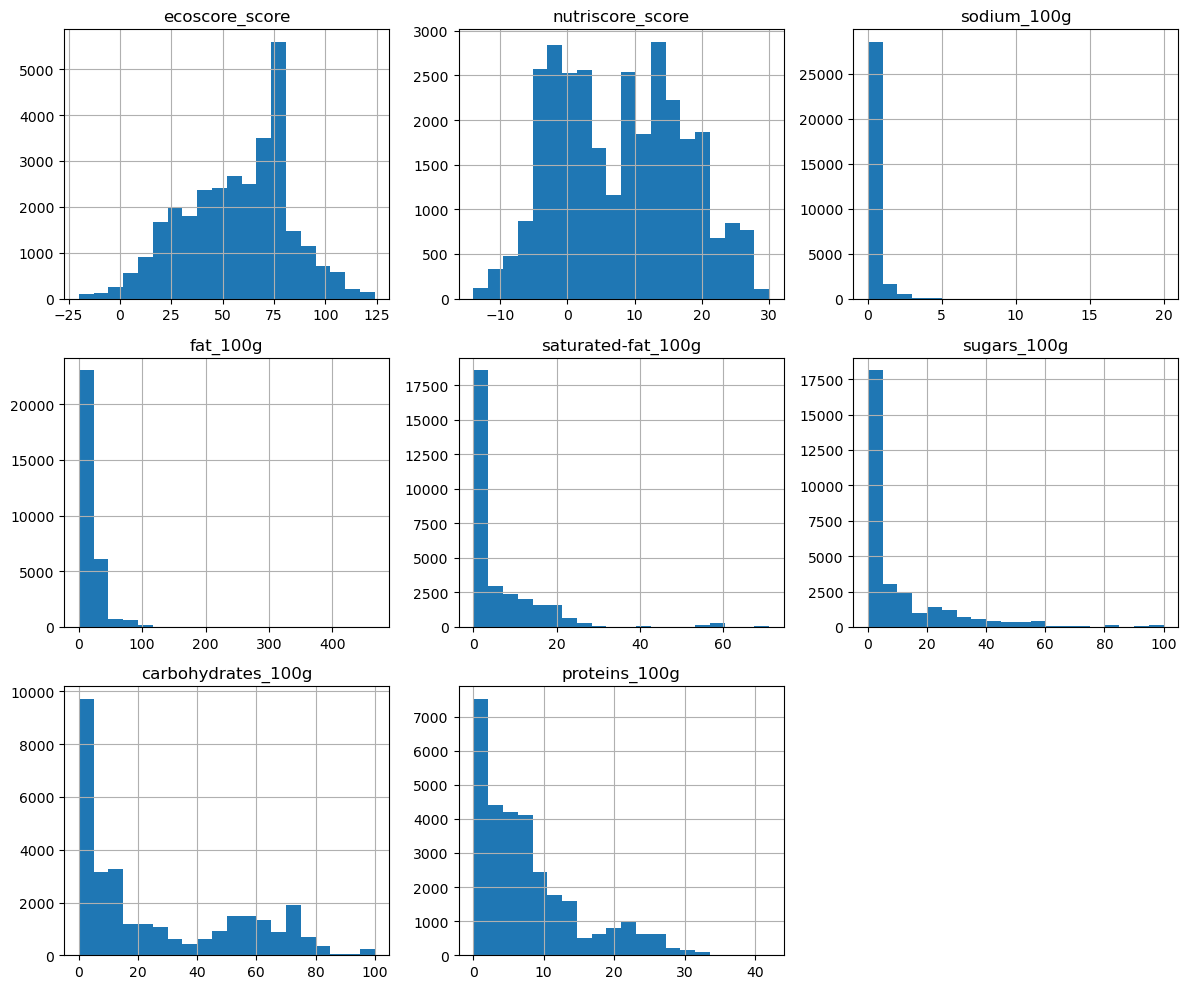

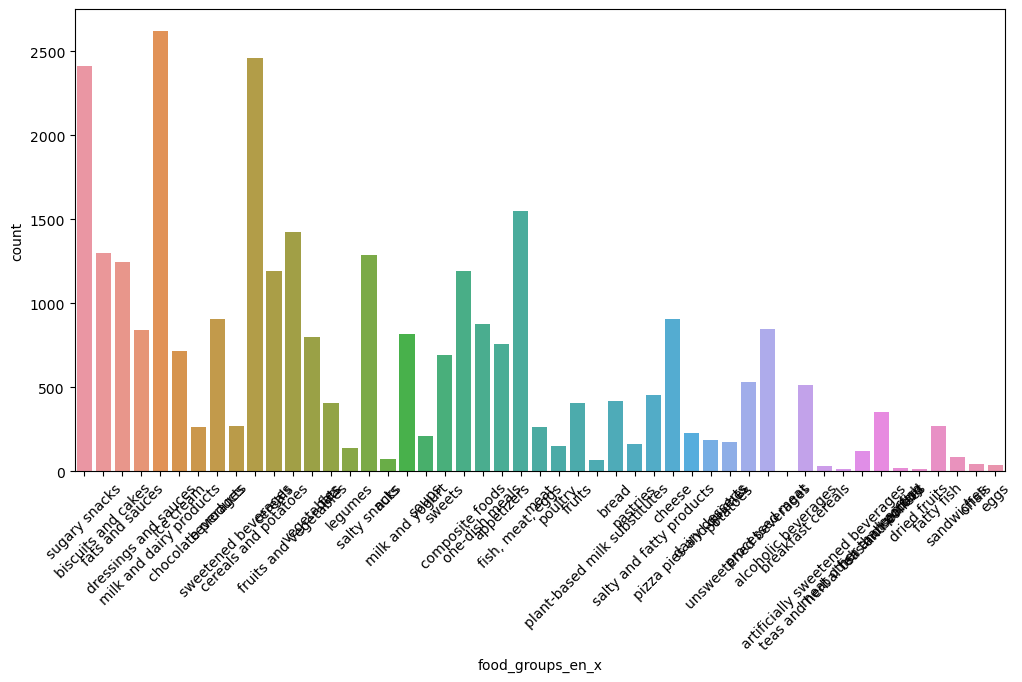

In [6]:
# 2. Exploratory Data Analysis (EDA)
# Numeric variables
numeric_cols = ['ecoscore_score', 'nutriscore_score', 'sodium_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'carbohydrates_100g', 'proteins_100g']
data[numeric_cols].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()
# Categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='food_groups_en_x')
plt.xticks(rotation=45)
plt.show()

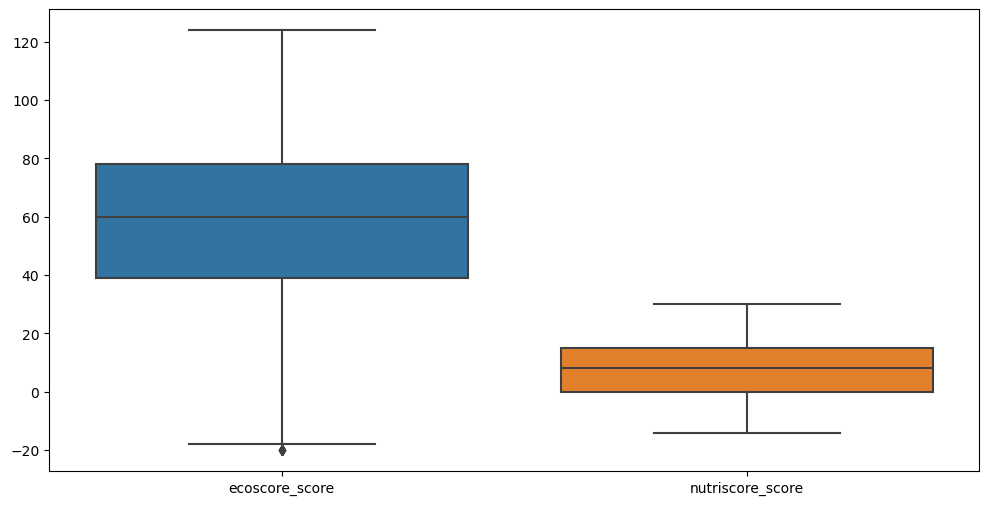

In [7]:
# 3. Key Insights and Trends
# Popular food groups, countries, brands, etc.
top_food_groups = data['food_groups_en_x'].value_counts().head(10)
top_countries = data['countries_en_x'].value_counts().head(10)
top_brands = data['brands'].value_counts().head(10)
# Distribution of scores and nutritional attributes
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['ecoscore_score', 'nutriscore_score']])
plt.show()

In [8]:
# 4. Statistical Analysis
# Example: ANOVA to compare mean nutritional values across different food groups
import scipy.stats as stats
anova_results = stats.f_oneway(*[data[data['food_groups_en_x'] == group]['sodium_100g'] for group in data['food_groups_en_x'].unique()])
print("ANOVA results:", anova_results)

ANOVA results: F_onewayResult(statistic=235.77314573710254, pvalue=0.0)


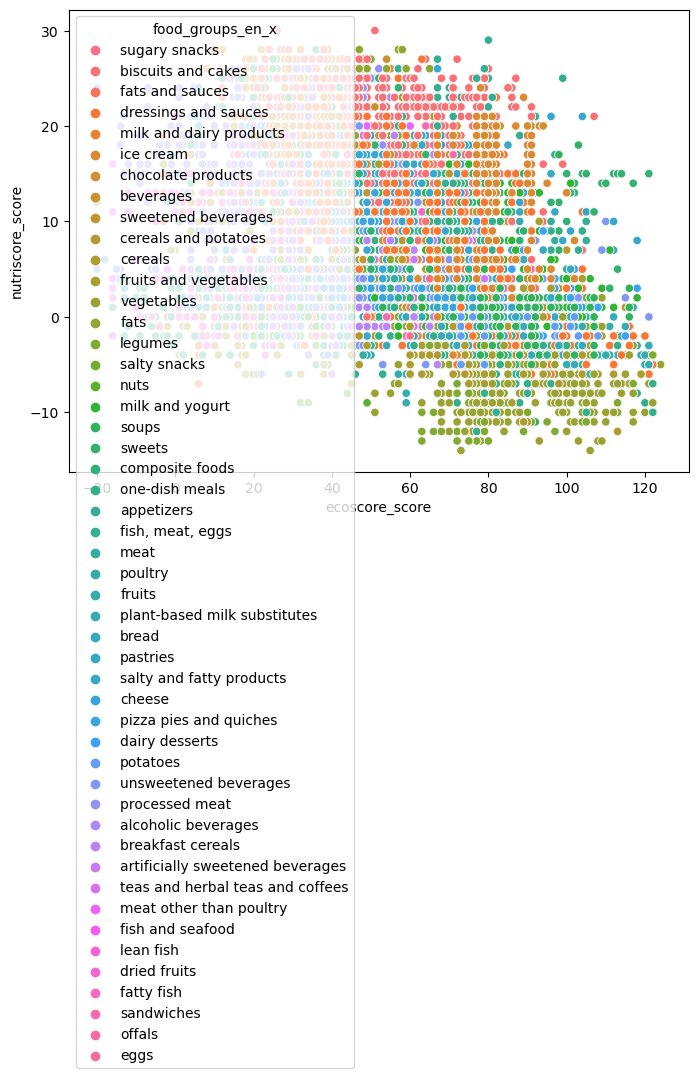

In [10]:
# 5. Visualization
# Example: Scatter plot of ecoscore_score vs. nutriscore_score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='ecoscore_score', y='nutriscore_score', hue='food_groups_en_x')
plt.show()

This code provides a basic framework for analyzing the provided dataset. Depending on specific requirements and the nature of the data, additional analysis and visualizations may be needed.

----------
## Prompt 2:

Pretend you are a graduate student at the University of Virginia pursuing a masters degree in Data Science. You need to analyze and summarize the OpenFoodFacts.org data to extract key insights and trends. Develop visualization methods to represent this data effectively and provide natural language explanations of the visualizations. 

-----------

As a graduate student at the University of Virginia pursuing a master's degree in Data Science, analyzing and summarizing the OpenFoodFacts.org data is an exciting opportunity to extract valuable insights and trends. To accomplish this task effectively, I'll follow a systematic approach that includes data exploration, visualization, and interpretation. Here's how I would proceed:

1. Data Exploration:

a. Load the Data:
    
    First, I'll load the OpenFoodFacts.org dataset into a Pandas DataFrame to understand its structure and contents.

In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv("data/preprocessed.csv")

# Display basic information about the dataset
print(data.info())

/var/folders/bn/jw4b363n6cz8jy9jwmhp7q0c0000gn/T/ipykernel_3505/3160724566.py:4: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/preprocessed.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540360 entries, 0 to 2540359
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   code                      object 
 1   food_groups_en_x          object 
 2   countries_en_x            object 
 3   product_name              object 
 4   countries_en_y            object 
 5   brands                    object 
 6   abbreviated_product_name  object 
 7   generic_name              object 
 8   quantity                  object 
 9   ecoscore_score            float64
 10  ecoscore_grade            object 
 11  nutrient_levels_tags      object 
 12  main_category_en          object 
 13  nutriscore_score          float64
 14  nutriscore_grade          object 
 15  nova_group                float64
 16  food_groups_en_y          object 
 17  sodium_100g               float64
 18  fat_100g                  float64
 19  saturated-fat_100g        float64
 20  sugars_100g             

b. Understand the Data:
    
    I'll examine the column names, data types, and the first few rows of the dataset to gain an initial understanding.

In [12]:
# Display the first few rows of the dataset
print(data.head())

# Get summary statistics for numeric columns
print(data.describe())

                   code         food_groups_en_x countries_en_x  \
0     00000000000000225    fruits and vegetables         france   
1     00000000000000225               vegetables         france   
2  00000000000026772226  milk and dairy products         france   
3  00000000000026772226           dairy desserts         france   
4         0000000000100          fats and sauces         france   

                   product_name countries_en_y         brands  \
0                jeunes pousses         France        endives   
1                jeunes pousses         France        endives   
2                          Skyr         France         Danone   
3                          Skyr         France         Danone   
4   moutarde au moût de raisin          France  courte paille   

  abbreviated_product_name generic_name quantity  ecoscore_score  ...  \
0                      NaN          NaN      NaN            79.0  ...   
1                      NaN          NaN      NaN            

2. Data Visualization:

a. Histograms:

    I'll create histograms to visualize the distribution of important numeric variables such as ecoscore_score and nutriscore_score.

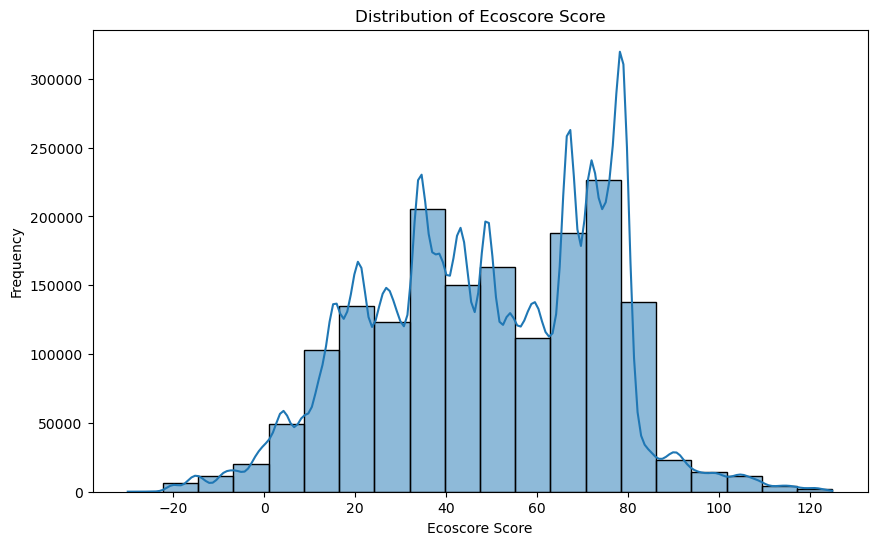

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of ecoscore_score
plt.figure(figsize=(10, 6))
sns.histplot(data['ecoscore_score'], bins=20, kde=True)
plt.title('Distribution of Ecoscore Score')
plt.xlabel('Ecoscore Score')
plt.ylabel('Frequency')
plt.show()

b. Scatter Plot:

    Next, I'll create a scatter plot to explore the relationship between ecoscore_score and nutriscore_score, differentiated by food groups.

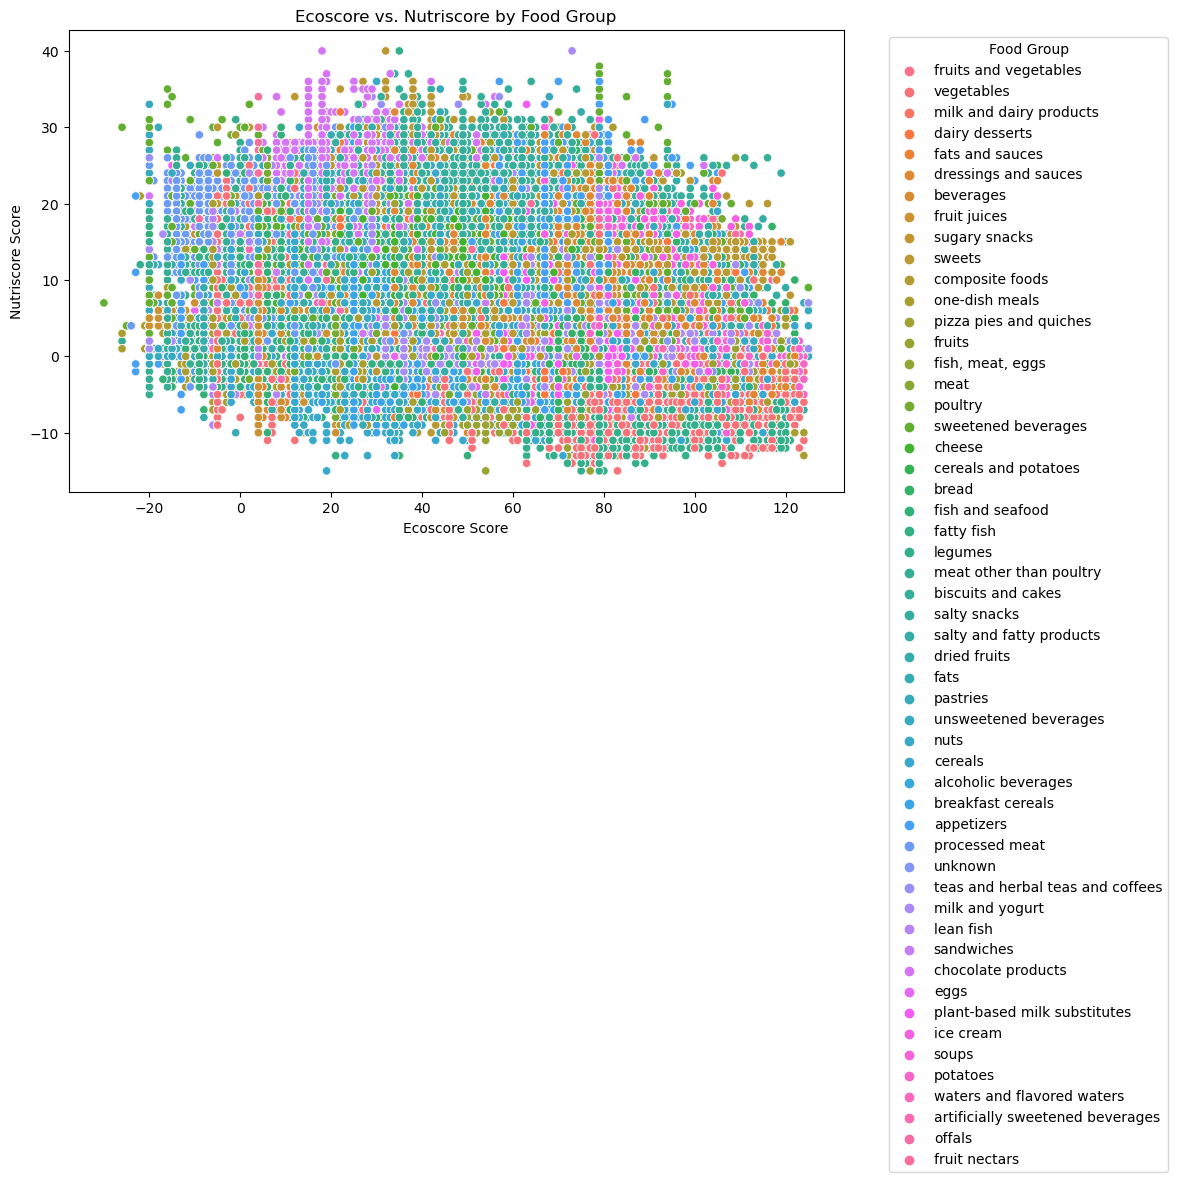

In [14]:
# Scatter plot of ecoscore_score vs. nutriscore_score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ecoscore_score', y='nutriscore_score', hue='food_groups_en_x')
plt.title('Ecoscore vs. Nutriscore by Food Group')
plt.xlabel('Ecoscore Score')
plt.ylabel('Nutriscore Score')
plt.legend(title='Food Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

3. Interpretation and Key Insights:

a. Distribution of Ecoscore Score:

    The histogram reveals the distribution of ecoscore_score, which is a measure of the environmental impact of food products. Most products seem to have ecoscore scores concentrated around certain values, indicating some consistency in environmental performance across the dataset.

b. Relationship between Ecoscore and Nutriscore:

    The scatter plot illustrates the relationship between ecoscore_score and nutriscore_score, with each point representing a food product, color-coded by food group. We can observe whether there's any correlation between the environmental impact and nutritional quality of food products across different food groups.

c. Further Analysis:

    Additional analyses could involve comparing nutritional content across different food groups, examining trends over time (if applicable), and identifying outliers or anomalies in the data.

By following this approach, we can effectively analyze the OpenFoodFacts.org data and derive meaningful insights that can inform decision-making processes related to food consumption and sustainability.

----------
## Prompt 3:

----------